# **Import des library**

In [99]:
# Général
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Réduction des dimensions
from sklearn.decomposition import PCA

# Dataming : modèles
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Performances

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

from yellowbrick.cluster import (
    KElbowVisualizer,
    SilhouetteVisualizer,
    InterclusterDistance,
)
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.neighbors import NearestNeighbors

# **Import du jeu de donnée**

In [100]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_scaled2.csv', sep=';')
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn
0,0.813038,0.0,0.283784,0.9,0.645656,0.0,0.0,0.0,0.450881,0.0,0.0,1.0,0.0
1,0.707257,1.0,0.229730,0.1,0.000000,0.0,1.0,1.0,0.416079,0.0,0.0,1.0,1.0
2,0.693727,1.0,0.391892,0.1,0.256798,0.5,0.0,1.0,0.482427,1.0,0.0,0.0,0.0
3,0.725707,0.0,0.162162,0.6,0.230410,0.0,1.0,0.0,0.941404,0.0,1.0,0.0,0.0
4,0.870849,1.0,0.405405,1.0,0.382819,0.0,1.0,0.0,0.372325,0.0,1.0,0.0,0.0


# **Classification**

In [101]:
def matrice_de_confusion(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)#, normalize = 'true')
    plt.figure(figsize = (6,4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues")

    # Redéfinissez les étiquettes des axes x et y
    new_xticklabels = df["churn"].unique()
    new_yticklabels = df["churn"].unique()

    plt.xticks(range(len(new_xticklabels)), new_xticklabels)
    plt.yticks(range(len(new_yticklabels)), new_yticklabels)

    # Donnez un nom à chaque axe
    plt.xlabel("Classe Prédite")
    plt.ylabel("Classe Réelle")

    plt.savefig('confusion_matrix.png', format='png', bbox_inches='tight')

    # Affichez la heatmap
    plt.show()

## RandomForestClassifier classification

Entrainement du modèle

In [102]:
# cross validation + grille de paramètres => entraînement du modèle avec GridSearchCV
randomforest = RandomForestClassifier()
trained_randomforest = GridSearchCV(randomforest,{'n_estimators' : [100, 500], 'max_depth' : [None, 10]},cv=5,verbose=2)
#trained_randomforest = GridSearchCV(randomforest,{},cv=5,verbose=2)
trained_randomforest.fit(df.iloc[:,:-1],list(df.iloc[:,-1]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   1.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=500; total time=   5.4s
[CV] END ...................max_depth=None, n_estimators=500; total time=   5.1s
[CV] END ...................max_depth=None, n_estimators=500; total time=   4.6s
[CV] END ...................max_depth=None, n_estimators=500; total time=   5.8s
[CV] END ...................max_depth=None, n_estimators=500; total time=   4.6s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.8s
[CV] END .....................max_depth=10, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [100, 500]},
             verbose=2)

In [110]:
model=trained_randomforest.best_estimator_

Sur le jeu de donnée de base

In [111]:
y_pred = model.predict(df.iloc[:,:-1])
df_randomforest = df.copy()
df_randomforest['pred'] = y_pred
df_randomforest.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn,pred
0,0.813038,0.0,0.283784,0.9,0.645656,0.0,0.0,0.0,0.450881,0.0,0.0,1.0,0.0,0.0
1,0.707257,1.0,0.229730,0.1,0.000000,0.0,1.0,1.0,0.416079,0.0,0.0,1.0,1.0,0.0
2,0.693727,1.0,0.391892,0.1,0.256798,0.5,0.0,1.0,0.482427,1.0,0.0,0.0,0.0,0.0
3,0.725707,0.0,0.162162,0.6,0.230410,0.0,1.0,0.0,0.941404,0.0,1.0,0.0,0.0,0.0
4,0.870849,1.0,0.405405,1.0,0.382819,0.0,1.0,0.0,0.372325,0.0,1.0,0.0,0.0,1.0


### Interprétation random forest

In [112]:
y_true = df.iloc[:,-1]
confusion_matrix(y_true, y_pred)

array([[6280,   50],
       [ 727,  860]])

In [113]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      6330
         1.0       0.95      0.54      0.69      1587

    accuracy                           0.90      7917
   macro avg       0.92      0.77      0.82      7917
weighted avg       0.91      0.90      0.89      7917



accuracy > 0.8 donc bon accuracy

### Import des données test

In [114]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_test_scaled2.csv', sep=';')
df_test.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,0.434870,0.0,0.121622,0.1,0.538248,0.000000,0.0,1.0,0.227784,0.0,0.0,1.0
1,0.829659,0.0,0.513514,0.1,0.000000,0.000000,1.0,0.0,0.066093,1.0,0.0,0.0
2,0.763527,1.0,0.202703,0.8,0.000000,0.000000,1.0,0.0,0.599413,0.0,0.0,1.0
3,0.831663,1.0,0.310811,0.6,0.459065,0.333333,1.0,0.0,0.311984,0.0,0.0,1.0
4,0.645291,0.0,0.256757,1.0,0.000000,0.333333,1.0,1.0,0.187017,1.0,0.0,0.0


Prédiction sur les données test

In [115]:
y_pred_test = model.predict(df_test)
df_randomforest_test = df_test.copy()
df_randomforest_test['churn'] = y_pred_test
df_randomforest_test.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn
0,0.434870,0.0,0.121622,0.1,0.538248,0.000000,0.0,1.0,0.227784,0.0,0.0,1.0,0.0
1,0.829659,0.0,0.513514,0.1,0.000000,0.000000,1.0,0.0,0.066093,1.0,0.0,0.0,1.0
2,0.763527,1.0,0.202703,0.8,0.000000,0.000000,1.0,0.0,0.599413,0.0,0.0,1.0,0.0
3,0.831663,1.0,0.310811,0.6,0.459065,0.333333,1.0,0.0,0.311984,0.0,0.0,1.0,0.0
4,0.645291,0.0,0.256757,1.0,0.000000,0.333333,1.0,1.0,0.187017,1.0,0.0,0.0,0.0


In [117]:
df_randomforest_test.to_csv("pred_test.csv",index=False, sep=';')

# AdaBoost

In [118]:
adaboost = AdaBoostClassifier()
trained_adaboost = GridSearchCV(adaboost,{'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]},cv=5,verbose=2)
#trained_adaboost = GridSearchCV(adaboost,{},cv=5,verbose=2)
trained_adaboost.fit(df.iloc[:,:-1],list(df.iloc[:,-1]))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.9s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.9s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.4s
[CV] END ................learning_rate=0.1, n_est

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [119]:
model_adaboost=trained_adaboost.best_estimator_

In [120]:
y_pred = model_adaboost.predict(df.iloc[:,:-1])
df_adaboost = df.copy()
df_adaboost['pred'] = y_pred
df_adaboost.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn,pred
0,0.813038,0.0,0.283784,0.9,0.645656,0.0,0.0,0.0,0.450881,0.0,0.0,1.0,0.0,0.0
1,0.707257,1.0,0.229730,0.1,0.000000,0.0,1.0,1.0,0.416079,0.0,0.0,1.0,1.0,0.0
2,0.693727,1.0,0.391892,0.1,0.256798,0.5,0.0,1.0,0.482427,1.0,0.0,0.0,0.0,0.0
3,0.725707,0.0,0.162162,0.6,0.230410,0.0,1.0,0.0,0.941404,0.0,1.0,0.0,0.0,0.0
4,0.870849,1.0,0.405405,1.0,0.382819,0.0,1.0,0.0,0.372325,0.0,1.0,0.0,0.0,1.0


In [121]:
y_true = df.iloc[:,-1]
confusion_matrix(y_true, y_pred)

array([[6129,  201],
       [ 923,  664]])

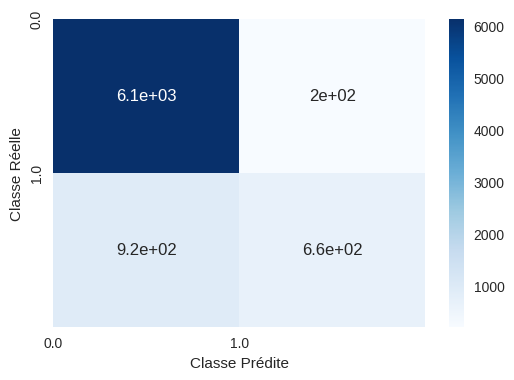

In [122]:
matrice_de_confusion(y_true, y_pred)

In [123]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      6330
         1.0       0.77      0.42      0.54      1587

    accuracy                           0.86      7917
   macro avg       0.82      0.69      0.73      7917
weighted avg       0.85      0.86      0.84      7917



In [126]:
y_pred_test = model_adaboost.predict(df_test)
df_adaboost_test = df_test.copy()
df_adaboost_test['pred'] = y_pred_test
df_adaboost_test.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,pred
0,0.434870,0.0,0.121622,0.1,0.538248,0.000000,0.0,1.0,0.227784,0.0,0.0,1.0,0.0
1,0.829659,0.0,0.513514,0.1,0.000000,0.000000,1.0,0.0,0.066093,1.0,0.0,0.0,1.0
2,0.763527,1.0,0.202703,0.8,0.000000,0.000000,1.0,0.0,0.599413,0.0,0.0,1.0,0.0
3,0.831663,1.0,0.310811,0.6,0.459065,0.333333,1.0,0.0,0.311984,0.0,0.0,1.0,0.0
4,0.645291,0.0,0.256757,1.0,0.000000,0.333333,1.0,1.0,0.187017,1.0,0.0,0.0,0.0


# **SVC**

In [124]:
svc = SVC()
trained_svc = GridSearchCV(svc,{    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'auto'],
    'kernel': ['linear', 'rbf']},cv=5,verbose=2)
#trained_svc = GridSearchCV(svc,{},cv=5,verbose=2)
trained_svc.fit(df.iloc[:,:-1],df.iloc[:,-1])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [127]:
model_svc=trained_svc.best_estimator_

In [128]:
y_pred = model_svc.predict(df.iloc[:,:-1])
df_svc = df.copy()
df_svc['pred'] = y_pred
df_svc.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn,pred
0,0.813038,0.0,0.283784,0.9,0.645656,0.0,0.0,0.0,0.450881,0.0,0.0,1.0,0.0,0.0
1,0.707257,1.0,0.229730,0.1,0.000000,0.0,1.0,1.0,0.416079,0.0,0.0,1.0,1.0,0.0
2,0.693727,1.0,0.391892,0.1,0.256798,0.5,0.0,1.0,0.482427,1.0,0.0,0.0,0.0,0.0
3,0.725707,0.0,0.162162,0.6,0.230410,0.0,1.0,0.0,0.941404,0.0,1.0,0.0,0.0,0.0
4,0.870849,1.0,0.405405,1.0,0.382819,0.0,1.0,0.0,0.372325,0.0,1.0,0.0,0.0,1.0


In [129]:
y_true = df.iloc[:,-1]
confusion_matrix(y_true, y_pred)

array([[6190,  140],
       [ 849,  738]])

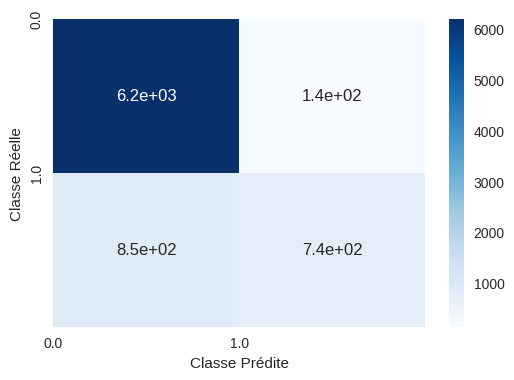

In [130]:
matrice_de_confusion(y_true, y_pred)

In [131]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6330
         1.0       0.84      0.47      0.60      1587

    accuracy                           0.88      7917
   macro avg       0.86      0.72      0.76      7917
weighted avg       0.87      0.88      0.86      7917



# **ROC Curve**

In [133]:
#Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   4.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.6s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.6s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.0s
[CV] END ......................C=0.1, gamma=1, k

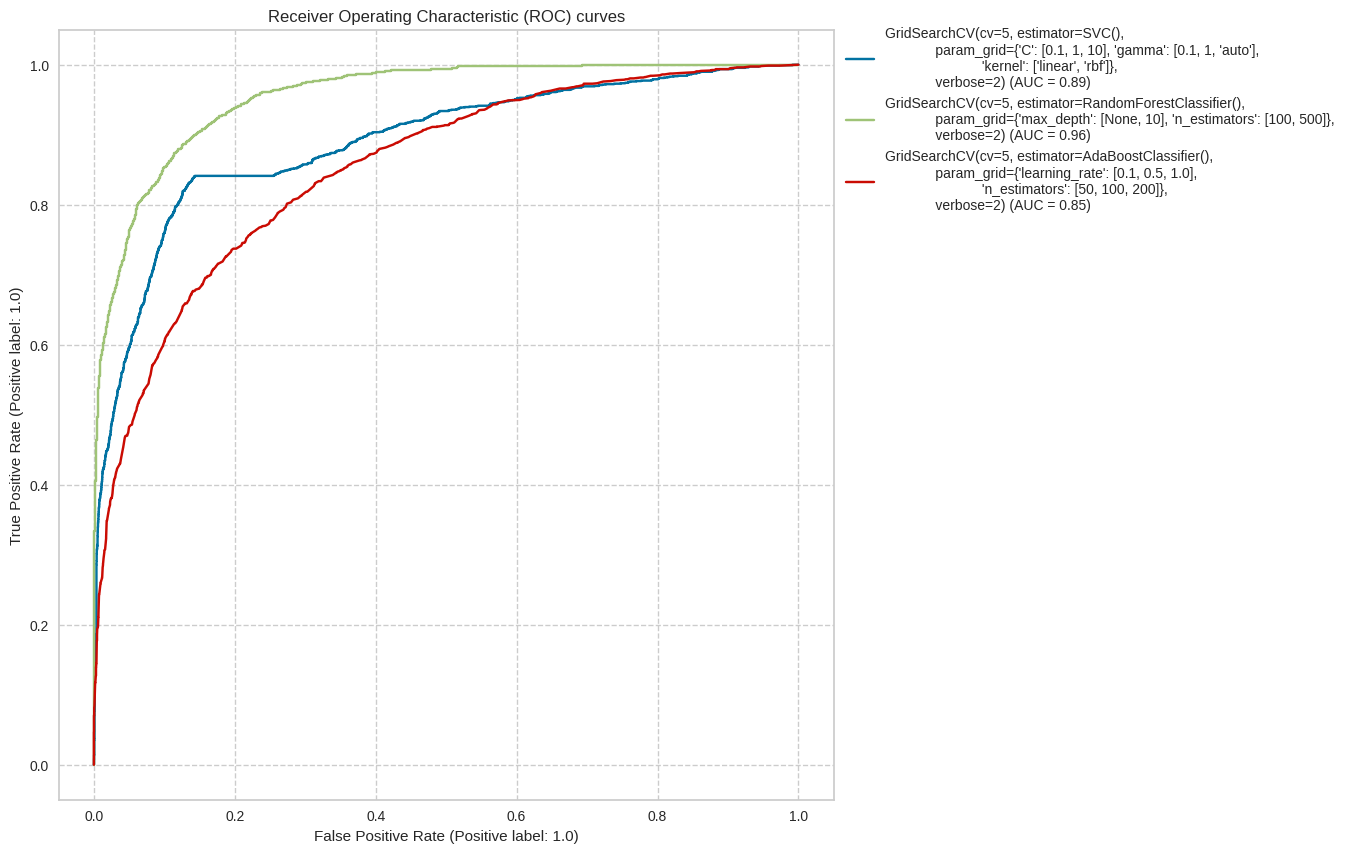

In [134]:
X_ = df.iloc[:,:-1]
y_ = df.iloc[:,-1]

fig, ax_roc = plt.subplots(1, 1, figsize=(10, 10))

for clf in [trained_svc,trained_randomforest,trained_adaboost]:
    clf.fit(X_, y_)

    RocCurveDisplay.from_estimator(clf, X_, y_, ax=ax_roc, name=clf)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")

ax_roc.grid(linestyle="--")

plt.legend(bbox_to_anchor=(1,1.02))
plt.savefig('ROC_curve.png', format='png', bbox_inches='tight')
plt.show()

Choix du modèle random forest car c'est celui où l'on a la meilleure accuracy ainsi que roc curve